<a href="https://colab.research.google.com/github/NoranMorad7/HR-Data-Analysis/blob/main/HR_Final_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HR Performance Analysis

# ![HR-Management-Systems-scaled.webp](attachment:5f8c3060-7be3-4f15-b5f5-61f7caa2a95e.webp)

In [ ]:
# import Important libraries that we will use
import numpy as np  # for numerical operations especially on arrays and matrices.
import pandas as pd  # for data manipulation and analysis in DataFrame format.
import matplotlib.pyplot as plt  # plotting library used for creating interactive visualizations.
import seaborn as sns  # built on top of matplotlib and is used for making statistical graphics.
import warnings  # to manage warning messages in the code.
import plotly.express as px  # to create interactive visualizations easily.
# Ignore warning messages to keep the output clean and readable
warnings.filterwarnings('ignore')

# Data Preprocessing

## Employee

In [ ]:
# Load data from CSV file
data_employee= pd.read_csv("Employee.csv")
data_employee.head(5)

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6


In [ ]:
# show describe of data to check if there is any outliers
data_employee.describe()

,Age,DistanceFromHome (KM),Education,Salary,StockOptionLevel,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,28.989796,22.502721,2.912925,112956.497959,0.793878,4.562585,2.293197,3.440816,2.239456
std,7.993055,12.811124,1.024165,103342.889222,0.852077,3.288048,2.539093,2.945194,2.505774
min,18.000000,1.000000,1.000000,20387.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,12.000000,2.000000,43580.500000,0.000000,2.000000,0.000000,1.000000,0.000000
50%,26.000000,22.000000,3.000000,71199.500000,1.000000,4.000000,1.000000,3.000000,1.000000
75%,34.000000,33.000000,4.000000,142055.750000,1.000000,7.000000,4.000000,6.000000,4.000000
max,51.000000,45.000000,5.000000,547204.000000,3.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
# to know size of data and data type of each feature(clolumn)
data_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   int64 
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary                   1470 non-null  

In [ ]:
#check nulls in each column
data_employee.isnull().sum()

EmployeeID                 0
FirstName                  0
LastName                   0
Gender                     0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome (KM)      0
State                      0
Ethnicity                  0
Education                  0
EducationField             0
JobRole                    0
MaritalStatus              0
Salary                     0
StockOptionLevel           0
OverTime                   0
HireDate                   0
Attrition                  0
YearsAtCompany             0
YearsInMostRecentRole      0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [ ]:
#convert 0 ,1 to yes and no to make it more meaningfull and readable
data_employee['StockOptions'] = data_employee['StockOptionLevel'].apply(lambda x: 'Yes' if x > 0 else 'No')
data_employee['StillEmployed'] = data_employee['Attrition'].apply(lambda x: 'No' if x == 'Yes' else 'Yes')

In [ ]:
#form hire date column we convert it as a real date and calculate form it the number of years the employee spent it in the company
#by subtract the todat's date from hire date and make new column called(YearsAtCompany_Calculated)
from datetime import datetime
data_employee['HireDate'] = pd.to_datetime(data_employee['HireDate'])
today = datetime.today()
data_employee['YearsAtCompany_Calculated'] = data_employee['HireDate'].apply(lambda x: round((today - x).days / 365, 1))

In [ ]:
# drop unneccessary columns and columns tha we change their names
new_data_employee = data_employee.drop(['DistanceFromHome (KM)','HireDate','StockOptionLevel','Attrition'], axis=1)

In [ ]:
#print (show) all columns of employee after preprocessing
print(new_data_employee.columns)

Index(['EmployeeID', 'FirstName', 'LastName', 'Gender', 'Age',
       'BusinessTravel', 'Department', 'State', 'Ethnicity', 'Education',
       'EducationField', 'JobRole', 'MaritalStatus', 'Salary', 'OverTime',
       'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'StockOptions', 'StillEmployed',
       'YearsAtCompany_Calculated'],
      dtype='object')


In [ ]:
#change some content of state like (CA) to California to make it more understandable and clear
# and make the same at education column change numbers 1,2,..,5 to real estimation
new_data_employee['State'] = new_data_employee['State'].replace({
    'CA': 'California',
    'IL': 'Illinois',
    'NY':'Newyork City'
})
new_data_employee['Education'] = new_data_employee['Education'].replace({
    1: 'Less than High School',
    2: 'High School',
    3: 'Bachelor\'s Degree',
    4: 'Master\'s Degree',
    5: 'Doctorate'
})


In [ ]:
new_data_employee.head(5)

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,State,Ethnicity,Education,...,MaritalStatus,Salary,OverTime,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,StockOptions,StillEmployed,YearsAtCompany_Calculated
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,Illinois,White,Doctorate,...,Divorced,102059,No,10,4,9,7,Yes,Yes,13.4
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,California,White,Master's Degree,...,Single,157718,Yes,10,6,10,0,No,Yes,13.4
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,California,Asian or Asian American,Master's Degree,...,Married,309964,No,10,6,10,8,Yes,Yes,13.4
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,Illinois,White,Bachelor's Degree,...,Married,293132,No,10,10,10,0,No,Yes,13.4
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,California,White,High School,...,Single,49606,No,6,1,1,6,No,No,13.4


In [ ]:
#at the end check if there is any duplicats
new_data_employee.duplicated().sum()

0

## Performance

In [ ]:
# load data of performance
data_perf=pd.read_csv("PerformanceRating.csv")
data_perf.head(5)

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,PR01,79F7-78EC,1/2/2013,5,4,5,1,0,4,4,4
1,PR02,B61E-0F26,1/3/2013,5,4,4,1,3,4,4,3
2,PR03,F5E3-48BB,1/3/2013,3,4,5,3,2,3,5,4
3,PR04,0678-748A,1/4/2013,5,3,2,2,0,2,3,2
4,PR05,541F-3E19,1/4/2013,5,2,3,1,0,4,4,3


In [ ]:
#show describe of data to check if there is any outliers
data_perf.describe()

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
count,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000
mean,3.872559,3.430616,3.427336,2.012968,1.017290,3.414667,3.984051,3.473394
std,0.940701,1.152565,1.156753,0.820310,0.950316,1.143961,0.816432,0.961738
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,2.000000
25%,3.000000,2.000000,2.000000,1.000000,0.000000,2.000000,3.000000,3.000000
50%,4.000000,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,3.000000
75%,5.000000,4.000000,4.000000,3.000000,2.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,3.000000,3.000000,5.000000,5.000000,5.000000


In [ ]:
# to know size of data and data type of each feature(clolumn)
data_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   PerformanceID                    6709 non-null   object
 1   EmployeeID                       6709 non-null   object
 2   ReviewDate                       6709 non-null   object
 3   EnvironmentSatisfaction          6709 non-null   int64 
 4   JobSatisfaction                  6709 non-null   int64 
 5   RelationshipSatisfaction         6709 non-null   int64 
 6   TrainingOpportunitiesWithinYear  6709 non-null   int64 
 7   TrainingOpportunitiesTaken       6709 non-null   int64 
 8   WorkLifeBalance                  6709 non-null   int64 
 9   SelfRating                       6709 non-null   int64 
 10  ManagerRating                    6709 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 576.7+ KB


In [ ]:
# check nulls
data_perf.isnull().sum()

PerformanceID                      0
EmployeeID                         0
ReviewDate                         0
EnvironmentSatisfaction            0
JobSatisfaction                    0
RelationshipSatisfaction           0
TrainingOpportunitiesWithinYear    0
TrainingOpportunitiesTaken         0
WorkLifeBalance                    0
SelfRating                         0
ManagerRating                      0
dtype: int64

In [ ]:
#check duplicates
data_perf.duplicated().sum()

0

In [ ]:
# convert estimation of [EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction'] at once form numbers to real estimation
columns_to_replace = ['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction']
for col in columns_to_replace:
    data_perf[col] = data_perf[col].replace({
        1: 'Dissatisfied',
        2: 'Slightly Satisfied',
        3: 'Neutral',
        4: 'Satisfied',
        5: 'Very Satisfied'
    })

In [ ]:
data_perf['WorkLifeBalance'] = data_perf['WorkLifeBalance'].replace({
        1: 'Unbalanced',
        2: 'Slightly Unbalanced',
        3: 'Neutral',
        4: 'Slightly Balanced',
        5: 'Very Balanced'
    })

In [ ]:
columns_to_replace = ['SelfRating', 'ManagerRating']
for col in columns_to_replace:
    data_perf[col] = data_perf[col].replace({
        1: 'Poor',
        2: 'Fair',
        3: 'Good',
        4: 'Very Good',
        5: 'Excellent'
    })


In [ ]:
#here we merge files together to get one file has the most important features from all sheets
merged_df = pd.merge(new_data_employee, data_perf, on='EmployeeID', how='left')

In [ ]:
#check duplicates
merged_df.duplicated().sum()

0

In [ ]:
#check nulls
merged_df.isnull().sum()

EmployeeID                           0
FirstName                            0
LastName                             0
Gender                               0
Age                                  0
BusinessTravel                       0
Department                           0
State                                0
Ethnicity                            0
Education                            0
EducationField                       0
JobRole                              0
MaritalStatus                        0
Salary                               0
OverTime                             0
YearsAtCompany                       0
YearsInMostRecentRole                0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
StockOptions                         0
StillEmployed                        0
YearsAtCompany_Calculated            0
PerformanceID                      190
ReviewDate                         190
EnvironmentSatisfaction            190
JobSatisfaction          

In [ ]:
# now we have nulls ,why?
# cause after merge files we have som eployees has no performance yet so how can we solve this ?
#we will put the categoriacl nulls with Not Reviewed' and  numerical ones with 0 So that this employee gets performance
performance_cols = [
    'PerformanceID',
    'ReviewDate',
    'EnvironmentSatisfaction',
    'JobSatisfaction',
    'RelationshipSatisfaction',
    'TrainingOpportunitiesWithinYear',
    'TrainingOpportunitiesTaken',
    'WorkLifeBalance',
    'SelfRating',
    'ManagerRating'
]

# Fill missing values (example: categorical = 'Not Reviewed', numeric = 0)
merged_df[performance_cols] = merged_df[performance_cols].fillna({
    'PerformanceID': 'Not Reviewed',
    'ReviewDate': 'Not Reviewed',
    'EnvironmentSatisfaction': 'Not Reviewed',
    'JobSatisfaction': 'Not Reviewed',
    'RelationshipSatisfaction': 'Not Reviewed',
    'TrainingOpportunitiesWithinYear': 0,
    'TrainingOpportunitiesTaken': 0,
    'WorkLifeBalance': 'Not Reviewed',
    'SelfRating': 'Not Reviewed',
    'ManagerRating': 'Not Reviewed'
})

In [ ]:
merged_df.head(5)

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,State,Ethnicity,Education,...,PerformanceID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,Illinois,White,Doctorate,...,PR1295,10/30/2016,Neutral,Neutral,Slightly Satisfied,3.0,0.0,Slightly Balanced,Good,Good
1,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,Illinois,White,Doctorate,...,PR1908,10/30/2017,Satisfied,Satisfied,Very Satisfied,3.0,1.0,Slightly Unbalanced,Good,Fair
2,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,Illinois,White,Doctorate,...,PR2617,10/30/2018,Very Satisfied,Very Satisfied,Satisfied,3.0,0.0,Slightly Balanced,Excellent,Excellent
3,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,Illinois,White,Doctorate,...,PR3436,10/30/2019,Dissatisfied,Neutral,Slightly Satisfied,3.0,1.0,Neutral,Excellent,Very Good
4,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,Illinois,White,Doctorate,...,PR411,10/31/2014,Neutral,Satisfied,Slightly Satisfied,1.0,0.0,Neutral,Very Good,Good


# Cleaning

In [ ]:
merged_df.isnull().sum()

EmployeeID                         0
FirstName                          0
LastName                           0
Gender                             0
Age                                0
BusinessTravel                     0
Department                         0
State                              0
Ethnicity                          0
Education                          0
EducationField                     0
JobRole                            0
MaritalStatus                      0
Salary                             0
OverTime                           0
YearsAtCompany                     0
YearsInMostRecentRole              0
YearsSinceLastPromotion            0
YearsWithCurrManager               0
StockOptions                       0
StillEmployed                      0
YearsAtCompany_Calculated          0
PerformanceID                      0
ReviewDate                         0
EnvironmentSatisfaction            0
JobSatisfaction                    0
RelationshipSatisfaction           0
T

In [ ]:
merged_df.duplicated().sum()

0

In [ ]:
merged_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6894    False
6895    False
6896    False
6897    False
6898    False
Length: 6899, dtype: bool

In [ ]:
# save this into csv file named Final_HR_Data
merged_df.to_csv("Final_HR_Data.csv", index=False)

In [ ]:
final_data=pd.read_csv("Final_HR_Data.csv")
final_data.shape

(6899, 32)

In [ ]:
num_employees = final_data['EmployeeID'].nunique()
print("NUM.of employees:", num_employees)

NUM.of employees: 1470


In [ ]:
#actual num of employees is 1470 but num of rows 6899 cause there is more than preformance for the same employee

In [ ]:
print(merged_df.columns)

Index(['EmployeeID', 'FirstName', 'LastName', 'Gender', 'Age',
       'BusinessTravel', 'Department', 'State', 'Ethnicity', 'Education',
       'EducationField', 'JobRole', 'MaritalStatus', 'Salary', 'OverTime',
       'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'StockOptions', 'StillEmployed',
       'YearsAtCompany_Calculated', 'PerformanceID', 'ReviewDate',
       'EnvironmentSatisfaction', 'JobSatisfaction',
       'RelationshipSatisfaction', 'TrainingOpportunitiesWithinYear',
       'TrainingOpportunitiesTaken', 'WorkLifeBalance', 'SelfRating',
       'ManagerRating'],
      dtype='object')


In [ ]:
df.describe()

,Age,Salary,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearsAtCompany_Calculated,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken
count,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000
mean,30.604146,110898.374112,5.578055,2.778953,4.143934,2.741412,9.276127,1.957530,0.989274
std,7.986542,98427.862382,3.410087,2.810170,3.203770,2.792284,3.137985,0.873447,0.951811
min,18.000000,20387.000000,0.000000,0.000000,0.000000,0.000000,2.300000,0.000000,0.000000
25%,25.000000,44646.000000,3.000000,0.000000,1.000000,0.000000,6.900000,1.000000,0.000000
50%,28.000000,74458.000000,6.000000,2.000000,4.000000,2.000000,9.900000,2.000000,1.000000
75%,36.000000,137219.500000,9.000000,5.000000,7.000000,5.000000,11.800000,3.000000,2.000000
max,51.000000,547204.000000,10.000000,10.000000,10.000000,10.000000,13.300000,3.000000,3.000000


# - Analysis Questions:

# What is the gender distribution of employees?

Remaining Gender Categories: ['Female' 'Male']


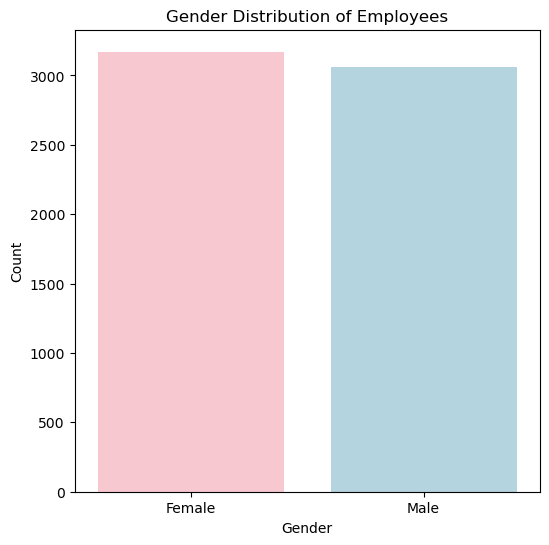

In [ ]:
# Remove rows where Gender is 'Non-Binary' or 'Prefer Not To Say'
df = df[~df['Gender'].isin(['Non-Binary', 'Prefer Not To Say'])]
print("Remaining Gender Categories:", df['Gender'].unique())
# Create a count plot to visualize gender distribution
plt.figure(figsize=(6,6))
sns.countplot(x=df['Gender'], palette=['pink', 'lightBlue'])
plt.title("Gender Distribution of Employees")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


# Does salary vary significantly across departments?

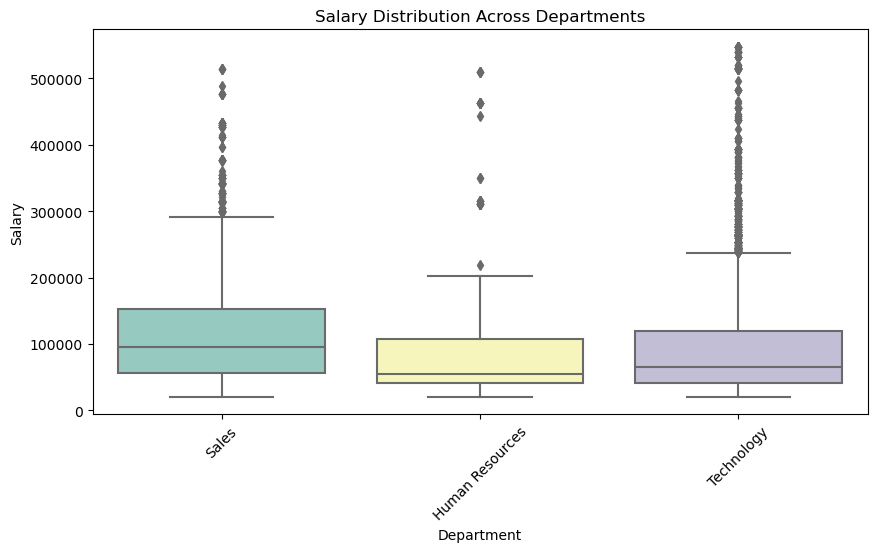

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(10,5))
# Create a boxplot to visualize the distribution of salaries across different departments
sns.boxplot(x='Department', y='Salary', data=df, palette='Set3')
plt.title("Salary Distribution Across Departments")
plt.xticks(rotation=45)
plt.show()

# What is the relationship between salary and years of experience ?

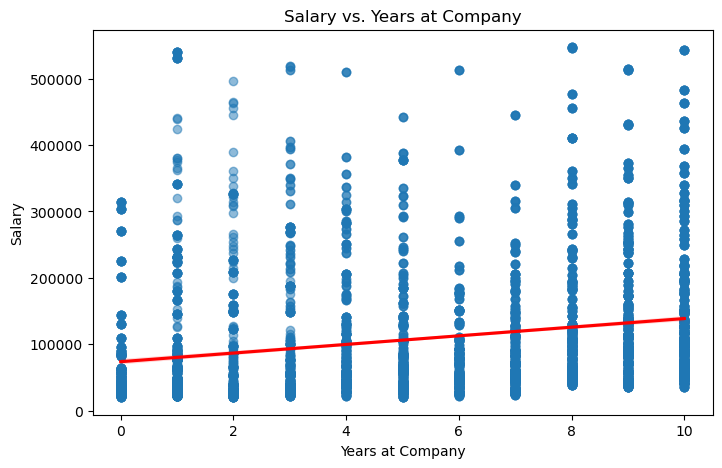

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot(x='YearsAtCompany', y='Salary', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Salary vs. Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Salary")
plt.show()
#Each dot represents an employee, plotting their Years at Company against their Salary.
#The red regression line helps identify trends between these two variables.

# What is the distribution of employee ethnicity across different departments ?

<Axes: xlabel='Department'>

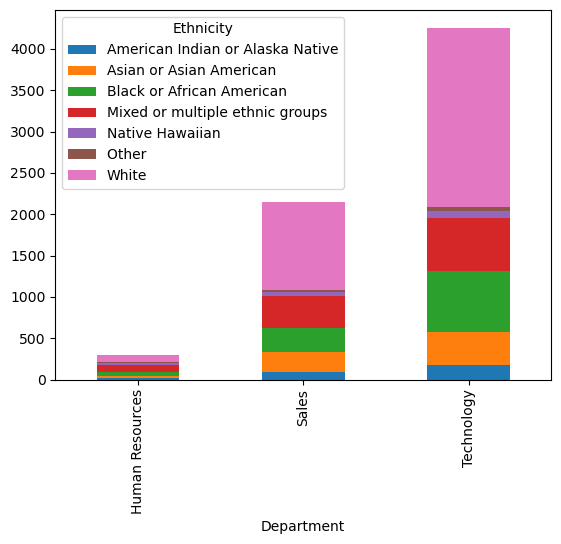

In [ ]:
# Ethnicity by department
pd.crosstab(df['Department'], df['Ethnicity']).plot(kind='bar', stacked=True)


# How do job satisfaction levels change across different departments ?

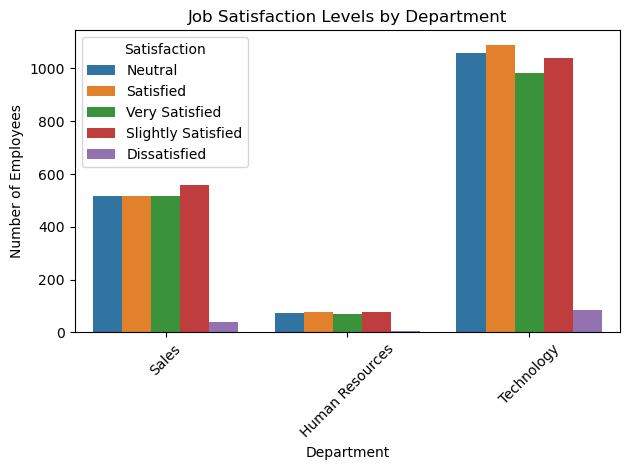

In [ ]:
sns.countplot(data=df, x='Department', hue='JobSatisfaction')
plt.xticks(rotation=45)
plt.title('Job Satisfaction Levels by Department')
plt.ylabel('Number of Employees')
plt.xlabel('Department')
plt.legend(title='Satisfaction')
plt.tight_layout()
plt.show()


# What is the average number of training opportunities taken in each department ?

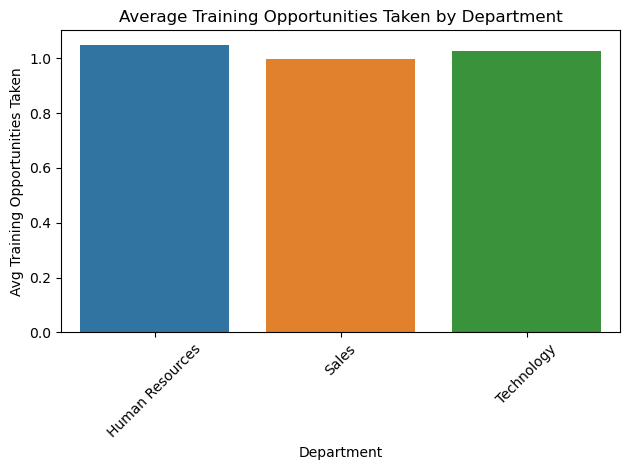

In [ ]:
# Group by Department and calculate the mean
grouped = df.groupby('Department')['TrainingOpportunitiesTaken'].mean().reset_index()
sns.barplot(data=grouped, x='Department', y='TrainingOpportunitiesTaken')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title('Average Training Opportunities Taken by Department')
plt.ylabel('Avg Training Opportunities Taken')
plt.xlabel('Department')
plt.tight_layout()
plt.show()


# What is the gender distribution across different departments ?

Remaining Gender Categories: ['Female' 'Male']


<Axes: xlabel='Gender', ylabel='count'>

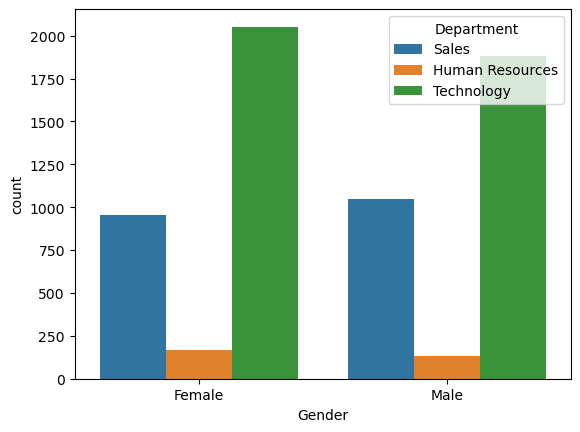

In [ ]:
f = df[~df['Gender'].isin(['Non-Binary', 'Prefer Not To Say'])]
print("Remaining Gender Categories:", df['Gender'].unique())
sns.countplot(data=df, x='Gender', hue='Department')

# What is the age distribution of employees ?

<Axes: xlabel='Age', ylabel='Count'>

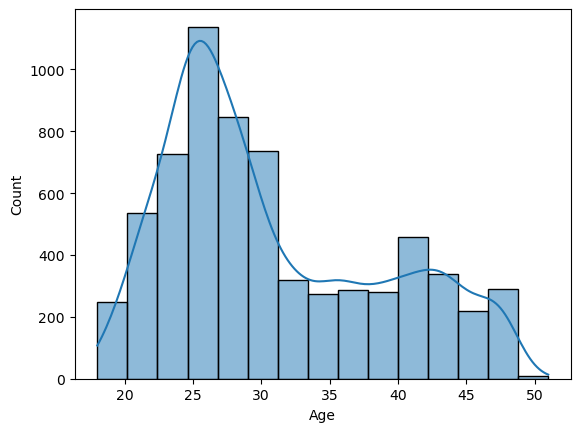

In [ ]:
sns.histplot(data=df, x='Age', bins=15, kde=True)

# How does the frequency of business travel vary within the company ?

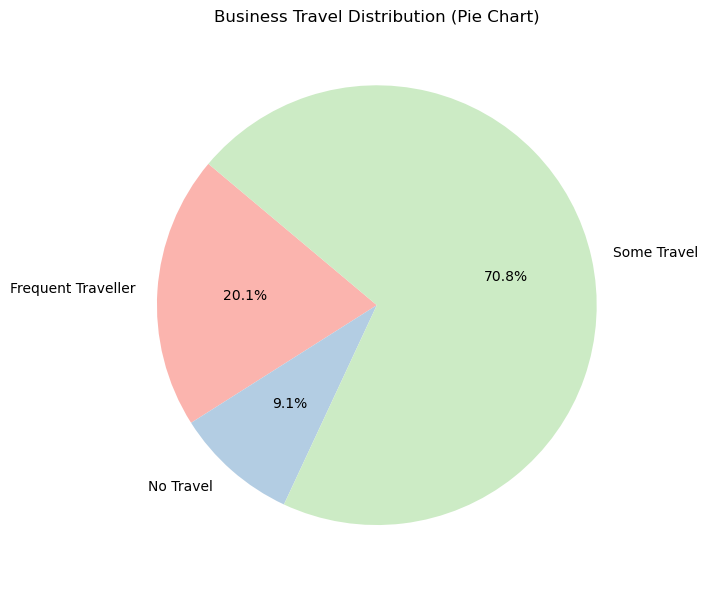

In [ ]:
# Count the occurrences of each BusinessTravel category and sort them alphabetically
balance_counts = df['BusinessTravel'].value_counts().sort_index()
labels = balance_counts.index
sizes = balance_counts.values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Business Travel Distribution (Pie Chart)')
plt.tight_layout()
plt.show()

# How do different satisfaction levels correlate with performance ratings?"

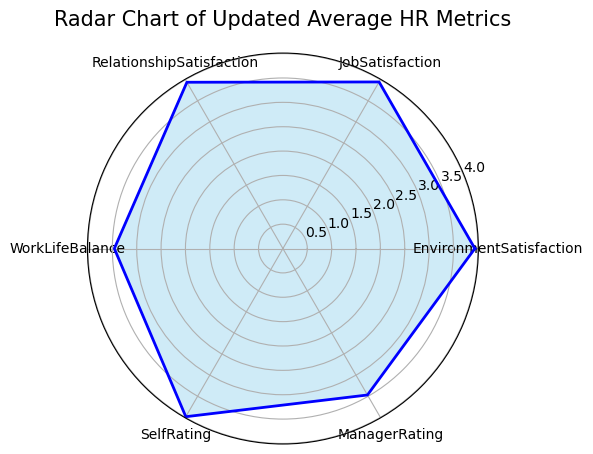

In [ ]:
df = pd.read_csv("Final_HR_Data(in).csv")

# Define updated columns and satisfaction mapping
columns = [
    'EnvironmentSatisfaction',
    'JobSatisfaction',
    'RelationshipSatisfaction',
    'WorkLifeBalance',
    'SelfRating',
    'ManagerRating'
]

satisfaction_mapping = {
    'Dissatisfied': 1,
    'Slightly Dissatisfied': 2,
    'Neutral': 3,
    'Satisfied': 4,
    'Very Satisfied': 5,
    'Very Unbalanced': 1,
    'Slightly Unbalanced': 2,
    'Slightly Balanced': 4,
    'Very Balanced': 5,
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Very Good': 4,
    'Excellent': 5
}

# Apply mapping to selected columns
for col in columns:
    if df[col].dtype == 'object':
        df[col] = df[col].map(satisfaction_mapping)

# Drop rows with missing values in selected columns
df_filtered = df[columns].dropna()

# Compute mean values
values = df_filtered.mean().values
labels = df_filtered.columns.tolist()

# Prepare data for radar chart
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values = np.concatenate((values, [values[0]]))  # Close the loop
angles += angles[:1]

# Plot the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, values, color='blue', linewidth=2)
ax.fill(angles, values, color='skyblue', alpha=0.4)

# Set chart labels and title
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title("Radar Chart of Updated Average HR Metrics", size=15, pad=20)

plt.tight_layout()
plt.show()

# JobSatisfaction = 3.9
# EnvironmentSatisfaction: 3.94
# RelationshipSatisfaction: 3.94
# WorkLifeBalance: 3.46
# SelfRating: 3.98
# ManagerRating: 3.47

# What job role is most likely to work overtime ?


Overtime Percentage by Job Role:
 OverTime                     No   Yes
JobRole                              
Analytics Manager          65.7  34.3
Data Scientist             68.5  31.5
Engineering Manager        76.2  23.8
HR Business Partner        64.0  36.0
HR Executive               82.4  17.6
HR Manager                 70.6  29.4
Machine Learning Engineer  72.0  28.0
Manager                    68.3  31.7
Recruiter                  59.9  40.1
Sales Executive            66.0  34.0
Sales Representative       64.8  35.2
Senior Software Engineer   76.6  23.4
Software Engineer          58.9  41.1


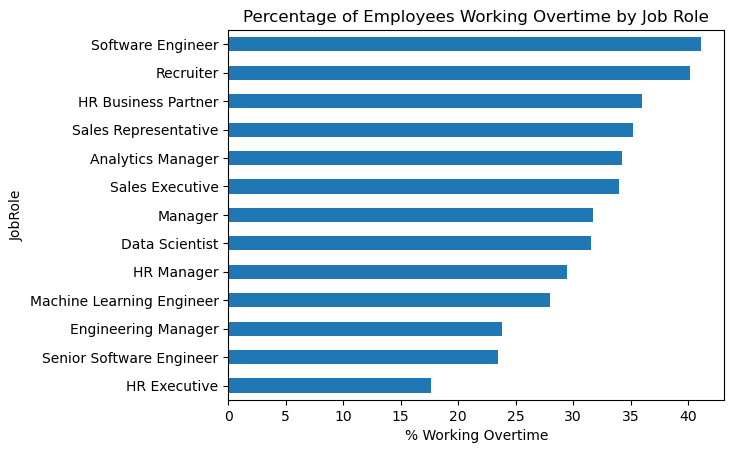

In [ ]:
# Calculate overtime percentage
overtime_percent = df.groupby('JobRole')['OverTime'].value_counts(normalize=True).unstack() * 100
print("\nOvertime Percentage by Job Role:\n", overtime_percent.round(1))

# Simple horizontal bar chart
overtime_percent['Yes'].sort_values().plot(kind='barh')
plt.title('Percentage of Employees Working Overtime by Job Role')
plt.xlabel('% Working Overtime')
plt.show()

# How does salary affected by education level ?


Average Salary by Education:
                Education    Salary
0      Bachelor's Degree  115837.0
1              Doctorate  159004.0
2            High School  103431.0
3  Less than High School   91528.0
4        Master's Degree  112656.0


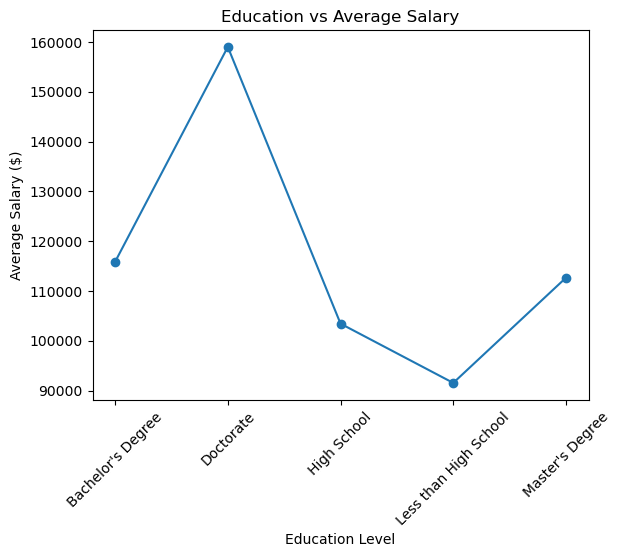

In [ ]:
# Group by education level
education_salary = df.groupby('Education')['Salary'].mean().reset_index()
print("\nAverage Salary by Education:\n", education_salary.round(0))
# Simple line plot
plt.plot(education_salary['Education'], education_salary['Salary'], marker='o')
plt.title('Education vs Average Salary')
plt.xlabel('Education Level')
plt.ylabel('Average Salary ($)')
plt.xticks(rotation=45)
plt.show()

# How does employee retention change over time ?

Data Types:
StillEmployed     int64
YearsAtCompany    int64
dtype: object

Sample Data:
   StillEmployed  YearsAtCompany
0              1              10
1              1              10
2              1              10
3              1              10
4              1              10

Retention Rates:
    YearsAtCompany  StillEmployed
0                0       0.190896
1                1       0.168360
2                2       0.291176
3                3       0.496703
4                4       0.684435
5                5       0.617591
6                6       0.768085
7                7       0.861538
8                8       0.919463
9                9       0.940618
10              10       0.990338


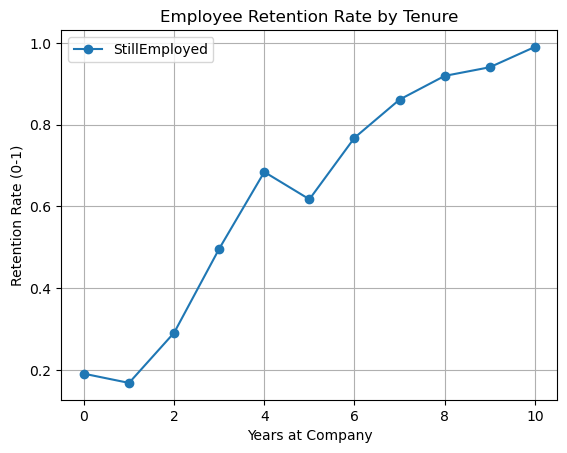

In [ ]:
df = pd.read_csv('Final_HR_Data(in).csv')

# Clean and convert columns
df['StillEmployed'] = df['StillEmployed'].map({'Yes': 1, 'No': 0})
df['YearsAtCompany'] = pd.to_numeric(df['YearsAtCompany'], errors='coerce')

# Remove rows with invalid data
df = df.dropna(subset=['StillEmployed', 'YearsAtCompany'])

# Verify conversions
print("Data Types:")
print(df[['StillEmployed', 'YearsAtCompany']].dtypes)
print("\nSample Data:")
print(df[['StillEmployed', 'YearsAtCompany']].head())

# Calculate retention rates
retention = df.groupby('YearsAtCompany')['StillEmployed'].mean().reset_index()
print("\nRetention Rates:")
print(retention)

# Simple plot
retention.plot(x='YearsAtCompany', y='StillEmployed', kind='line', marker='o')
plt.title('Employee Retention Rate by Tenure')
plt.xlabel('Years at Company')
plt.ylabel('Retention Rate (0-1)')
plt.grid(True)
plt.show()

# Forcasting :

In [ ]:
# Suppose we want to make a forecast of employees who will leave the company in the future.

In [ ]:
#first we will caculate the Resignation(Attrition) rate to determine how many employees have resigned
attrition_counts = merged_df['StillEmployed'].value_counts()
print(attrition_counts)

StillEmployed
Yes    4638
No     2261
Name: count, dtype: int64


In [ ]:
# we have 6899 employee ,2261 of whom have resigned.
# so the raio is (2261/6899)*100=32.7%
# The resignation rate is very high. It should not exceed 10 or 15%. Now we need to reduce this rate by knowing which employees will resign and
#trying to give them, for example,an incentive or something to reduce this resignation rate.

In [ ]:
from sklearn.preprocessing import LabelEncoder
merged_df.drop(columns=["EmployeeID"], inplace=True)
label_enc = LabelEncoder()
merged_df['StillEmployed'] = label_enc.fit_transform(merged_df['StillEmployed'])
for col in merged_df.select_dtypes(include='object').columns:
    merged_df[col] = label_enc.fit_transform(merged_df[col])

In [ ]:
# split data into 2 parts features that model will use and target column
# so in we make var x   and stored in it all features except target feature (the employee will stayed or exist)
# and in y store only target column
X = merged_df.drop("StillEmployed", axis=1)
y = merged_df["StillEmployed"]

In [ ]:
from sklearn.model_selection import train_test_split
#split x and y to train and test ,model will take train and learn from it and then test model or accuracy of model with the part of data (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
#we applied random forest model to make classification if employee will stay or leave company and fir our data on this model
#then use test set that we made in prediction
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9971014492753624
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       437
           1       1.00      1.00      1.00       943

    accuracy                           1.00      1380
   macro avg       1.00      1.00      1.00      1380
weighted avg       1.00      1.00      1.00      1380



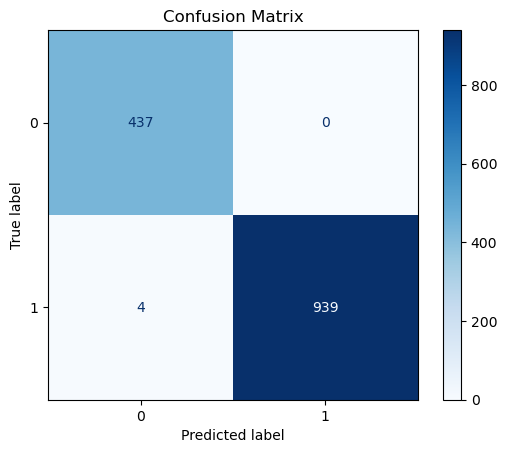

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
# display confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

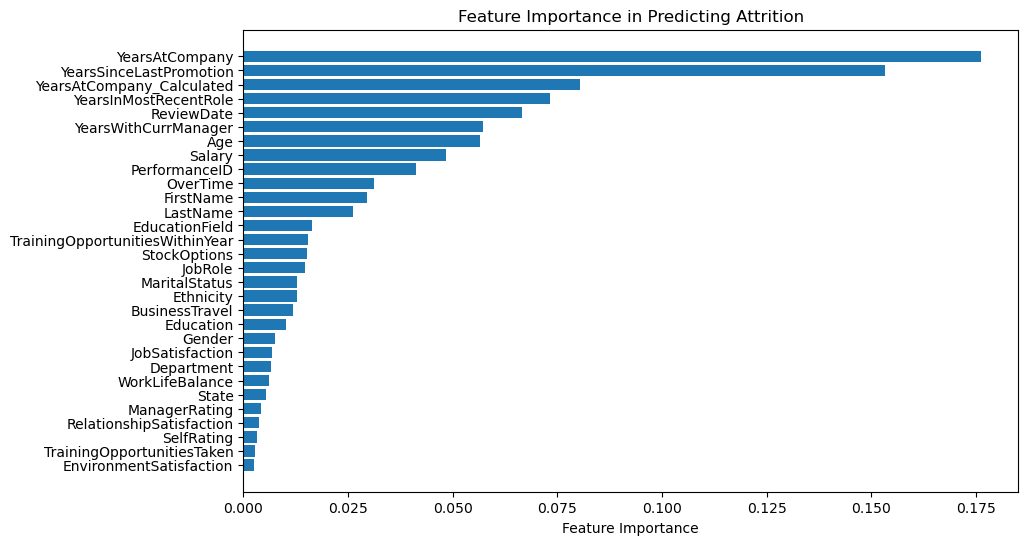

In [ ]:
#display the importance features that affects forcasting (if employee stay or leaves)
feature_importance = model.feature_importances_
features = X.columns
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 6))
plt.barh(features[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Predicting Attrition')
plt.show()


In [ ]:
pip install prophet pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Make sure ReviewDate is in datetime format
df['ReviewDate'] = pd.to_datetime(df['ReviewDate'], errors='coerce')

# Drop invalid dates (if any became NaT)
df = df.dropna(subset=['ReviewDate'])

# Check min and max dates
print("Start Date:", df['ReviewDate'].min())
print("End Date:", df['ReviewDate'].max())


Start Date: 2013-01-03 00:00:00
End Date: 2022-12-31 00:00:00


18:18:36 - cmdstanpy - INFO - Chain [1] start processing
18:18:36 - cmdstanpy - INFO - Chain [1] done processing


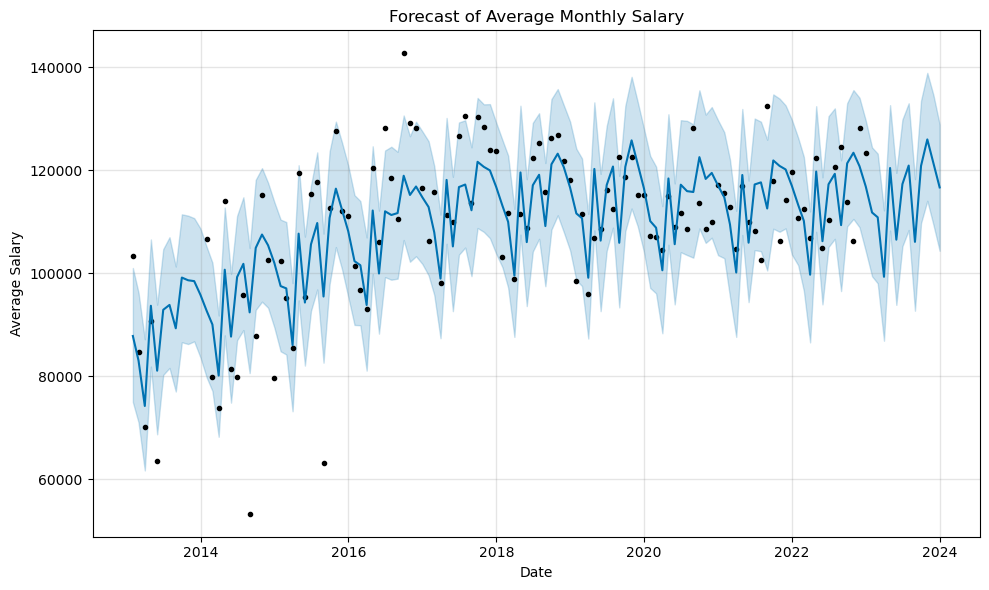

,ds,yhat,yhat_lower,yhat_upper
120,2023-01-31,111801.004834,99413.319294,124444.661431
121,2023-02-28,110868.662187,98037.487318,123230.145335
122,2023-03-31,99310.888087,86882.063309,112213.198771
123,2023-04-30,120450.516944,108288.117162,132661.469316
124,2023-05-31,106522.529483,93848.710573,119496.802161
125,2023-06-30,117318.072426,105240.711197,129870.031373
126,2023-07-31,120920.754347,108405.091713,133027.321025
127,2023-08-31,106098.579264,92715.570068,118286.786846
128,2023-09-30,120863.196897,109727.983016,133536.741920
129,2023-10-31,126001.154941,114074.075158,138932.686331


In [ ]:
# Forcasting for Avg Salary within one year
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

df = pd.read_csv("Final_HR_Data.csv")

# Remove rows with invalid dates
df = df[df['ReviewDate'] != 'Not Reviewed'].copy()

# Convert ReviewDate to datetime format
df['ReviewDate'] = pd.to_datetime(df['ReviewDate'])

# Group by month and calculate average salary
monthly_salary = df.groupby(pd.Grouper(key='ReviewDate', freq='M'))['Salary'].mean().reset_index()

# Rename columns for Prophet
monthly_salary.columns = ['ds', 'y']   # ds = datetime
                                       # y = the value to forecast

# Initialize and fit the Prophet model
model = Prophet()
model.fit(monthly_salary)

# Create a future dataframe for 12 months
future = model.make_future_dataframe(periods=12, freq='M')

# Forecast
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title("Forecast of Average Monthly Salary")
plt.xlabel("Date")
plt.ylabel("Average Salary")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optionally show forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)
 # yhat_lower : worest case estimate
 # yhat_upper : best case estimate

18:20:50 - cmdstanpy - INFO - Chain [1] start processing
18:20:50 - cmdstanpy - INFO - Chain [1] done processing


Processing Department: Sales


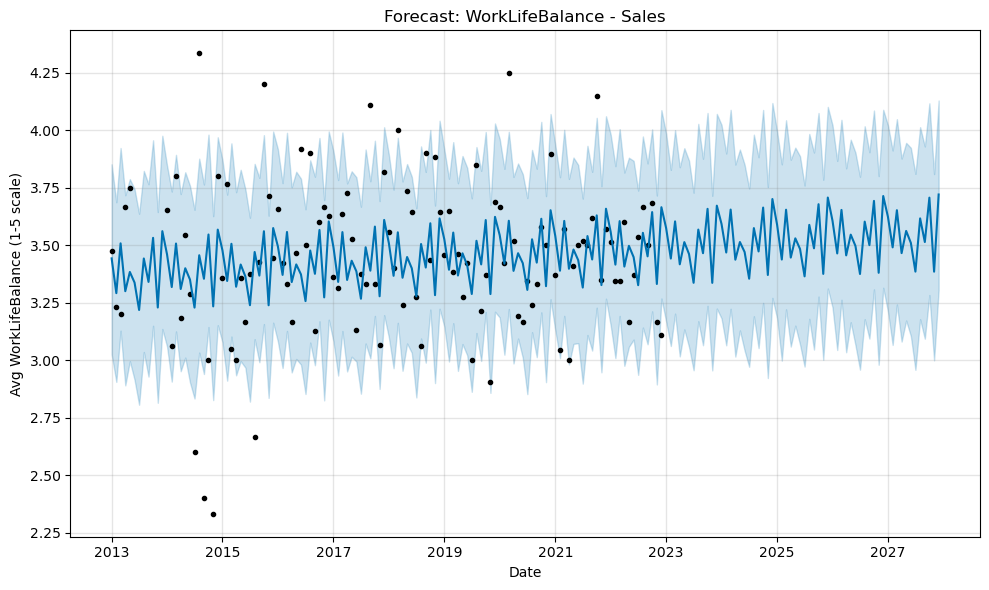

18:20:50 - cmdstanpy - INFO - Chain [1] start processing
18:20:50 - cmdstanpy - INFO - Chain [1] done processing


Processing Department: Human Resources


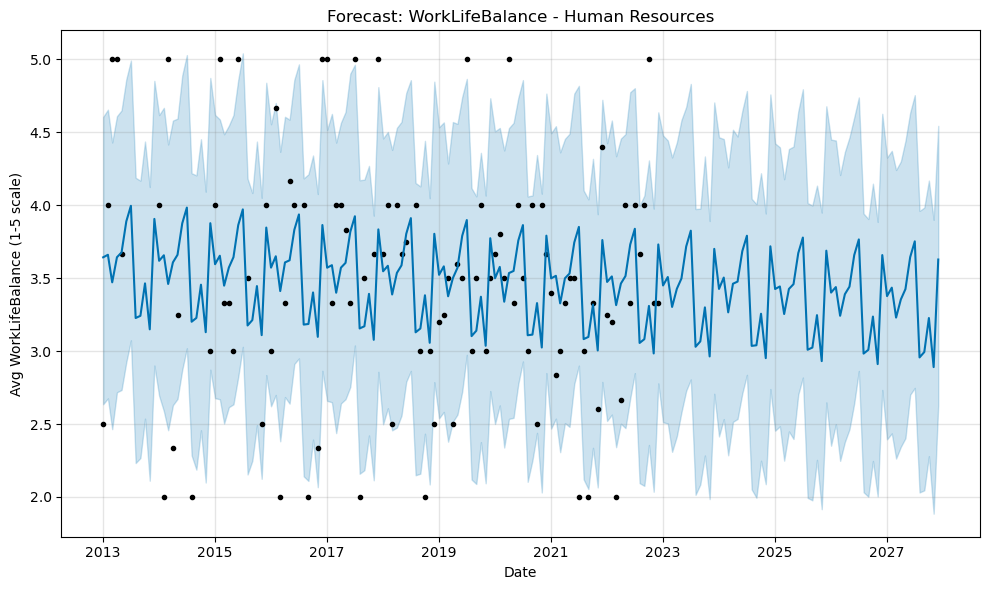

18:20:51 - cmdstanpy - INFO - Chain [1] start processing
18:20:51 - cmdstanpy - INFO - Chain [1] done processing


Processing Department: Technology


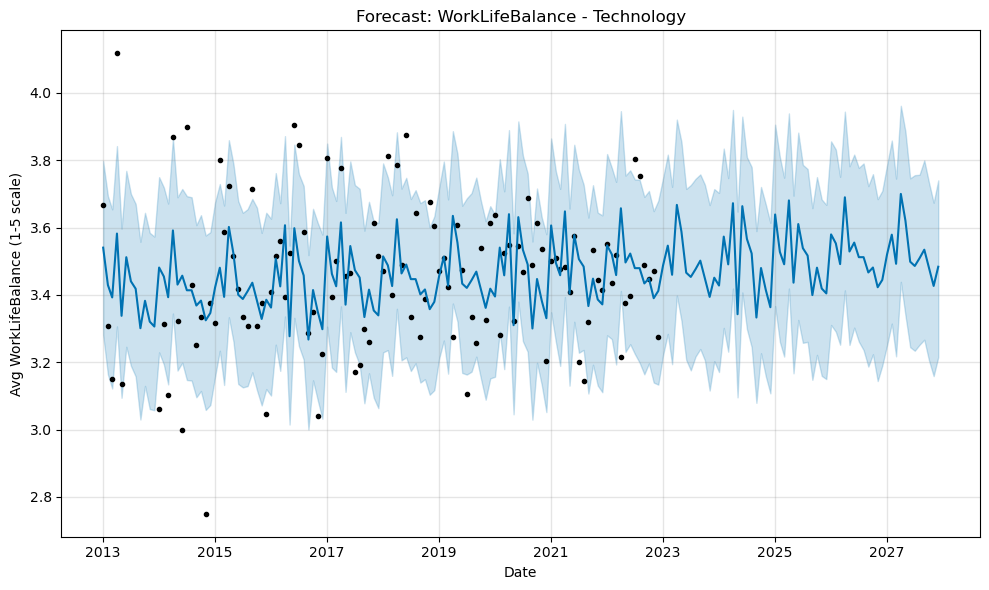

In [ ]:
# Forcast worklifebalance with each department for the next 5 years
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Final_HR_Data(in).csv")

# Clean 'ReviewDate'
df = df[df['ReviewDate'] != 'Not Reviewed'].copy()
df['ReviewDate'] = pd.to_datetime(df['ReviewDate'])

# Convert WorkLifeBalance from text to numeric scale
balance_map = {
    "Very Unbalanced": 1,
    "Slightly Unbalanced": 2,
    "Neutral": 3,
    "Slightly Balanced": 4,
    "Very Balanced": 5
}
df['WorkLifeBalance'] = df['WorkLifeBalance'].map(balance_map)

# Set forecast horizon: 5 years = 60 months
future_months = 12 * 5

# Target column
target_column = 'WorkLifeBalance'

# Get unique departments
departments = df['Department'].dropna().unique()

# Forecast for each department
for dept in departments:
    print(f"Processing Department: {dept}")

    # Filter for this department
    dept_df = df[df['Department'] == dept]

    # Group by month and calculate average WorkLifeBalance
    monthly_data = dept_df.groupby(pd.Grouper(key='ReviewDate', freq='MS'))[target_column].mean().reset_index()
    monthly_data.columns = ['ds', 'y']

    # Create and fit Prophet model
    model = Prophet()
    model.fit(monthly_data)

    # Create future dates
    future = model.make_future_dataframe(periods=future_months, freq='MS')

    # Forecast
    forecast = model.predict(future)

    # Plot results
    fig = model.plot(forecast)
    plt.title(f"Forecast: WorkLifeBalance - {dept}")
    plt.xlabel("Date")
    plt.ylabel("Avg WorkLifeBalance (1-5 scale)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


18:21:18 - cmdstanpy - INFO - Chain [1] start processing
18:21:18 - cmdstanpy - INFO - Chain [1] done processing


Processing Department: Sales


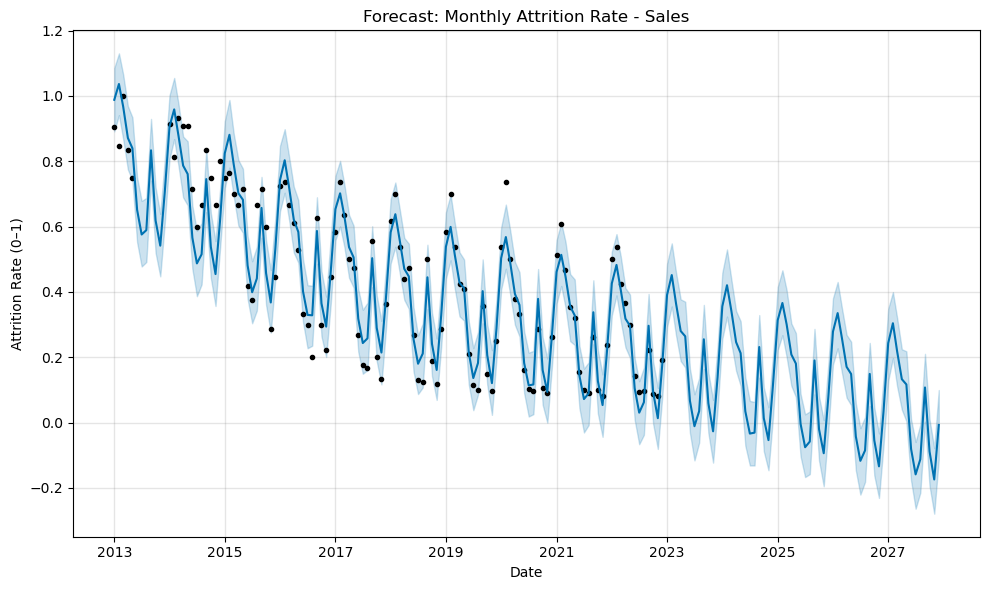

18:21:19 - cmdstanpy - INFO - Chain [1] start processing
18:21:19 - cmdstanpy - INFO - Chain [1] done processing


Processing Department: Human Resources


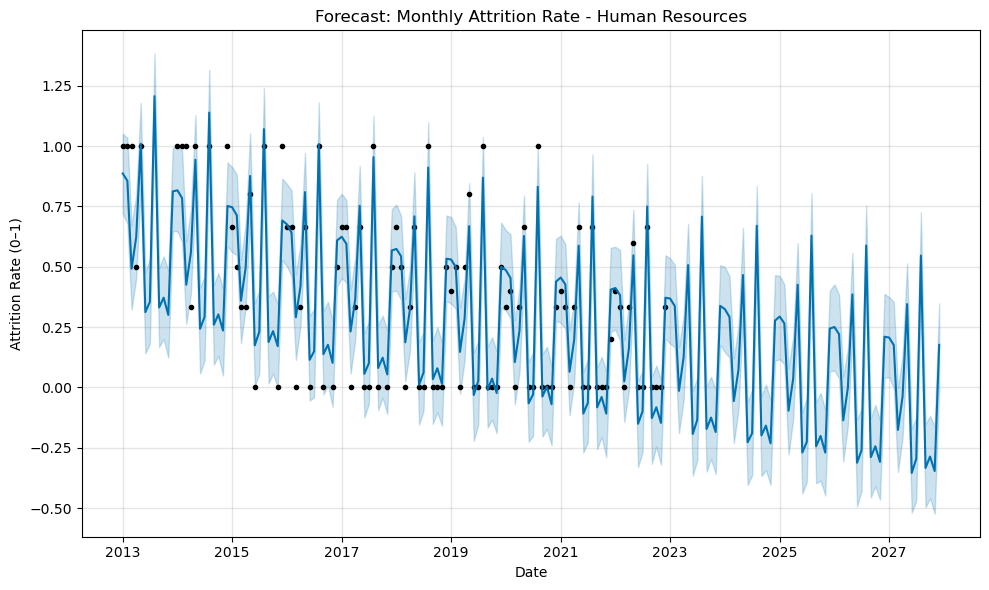

18:21:19 - cmdstanpy - INFO - Chain [1] start processing
18:21:19 - cmdstanpy - INFO - Chain [1] done processing


Processing Department: Technology


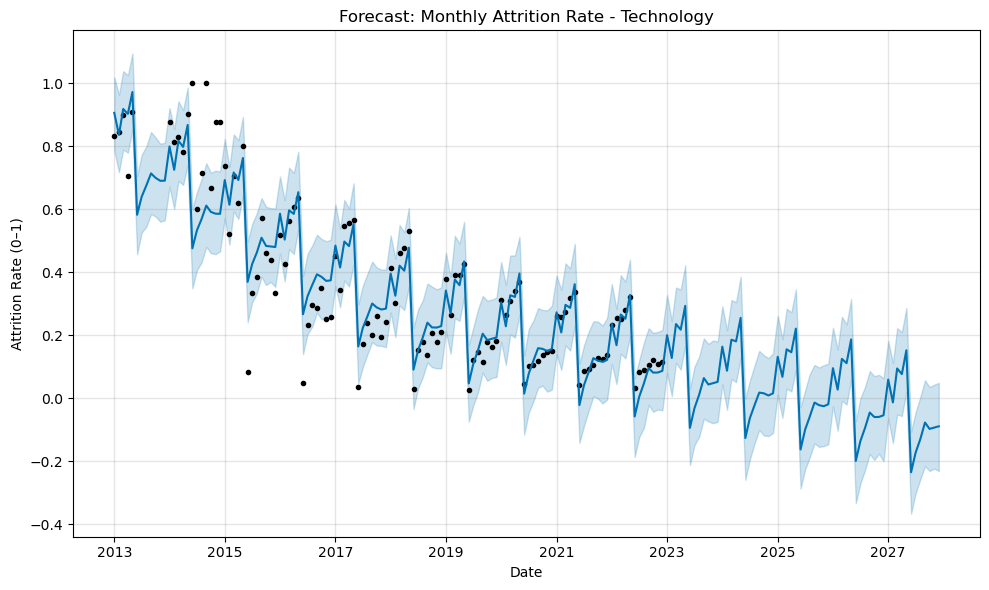

In [ ]:
# Forcast Attrition Rate with each department for the next 5 years

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Final_HR_Data(in).csv")

# Clean 'ReviewDate'
df = df[df['ReviewDate'] != 'Not Reviewed'].copy()
df['ReviewDate'] = pd.to_datetime(df['ReviewDate'])

# Convert StillEmployed -> Attrition (No = 1 [left], Yes = 0 [stayed])
df['Attrition'] = df['StillEmployed'].map({'No': 1, 'Yes': 0})

# Drop rows with missing Attrition
df = df.dropna(subset=['Attrition'])

# Forecast horizon: 5 years = 60 months
future_months = 12 * 5
target_column = 'Attrition'

# Unique departments
departments = df['Department'].dropna().unique()

for dept in departments:
    print(f"Processing Department: {dept}")

    # Filter department
    dept_df = df[df['Department'] == dept]

    # Group by month and calculate average Attrition (as rate)
    monthly_data = dept_df.groupby(pd.Grouper(key='ReviewDate', freq='MS'))[target_column].mean().reset_index()
    monthly_data.columns = ['ds', 'y']


    # Fit Prophet model
    model = Prophet()
    model.fit(monthly_data)

    # Create future dates
    future = model.make_future_dataframe(periods=future_months, freq='MS')

    # Forecast
    forecast = model.predict(future)

    # Plot results
    fig = model.plot(forecast)
    plt.title(f"Forecast: Monthly Attrition Rate - {dept}")
    plt.xlabel("Date")
    plt.ylabel("Attrition Rate (0–1)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()